# Linear Discriminant Analysis

We use LDA because it is more stable than Logistic regression when classes are well-separated and if the sample is small with an approximately normal distribution. It is also used when **we have more than two response classes**

LDA approach models the distribution of X for each class separately, and then uses **Bayes' theorem** to perform estimates for $Pr(Y|X)$.

The Bayes classifier used for prediction basically returns the class for which the condition probability of the observation belonging to the class given its features is the highest.

To quantify the goodness of the model, we use the **training error rate** obtained by taking the total number of errors on the training set divided by the number of observations.

Since the aim of Bayes classifier is to minimize test error rates, we can rewrite the test error rate as the **Bayes error rate**:

$$1 - E_X(max_j P(Y = j|X))$$

This value won't reach 0 because of the irreducible error present in every distribution.

We can obtain a **discriminant score** (which is derived by a manipulation of the Gaussian distribution plugged into the Bayes theorem for LDA). LDA is called **linear** because if we assume a Gaussian distribution for the variable we will obtain a Dscore which is a linear function of x.

From the discriminant score function, we can obtain the Bayes Decision Boundary which minimized misclassification. For p = 1, we have that the decision boundary is equal to $x = \frac{\mu_1 + \mu_2}{2}$

When p > 1, the discriminant function is still linear if all the observations are drawn from a multivariate Gaussian distribution.

From the discriminant score, we can obtain an estimated probability for each class given X. We will use this probability in order to choose the class which maximizes it.

We can vary the classification threshold by lowering it for Bayesian classifiers in order to prevent false negatives.

* Sensitivity is the complement of FN rate, also known as **true positive rate**.

* Specificity is the complement of FP rate, also known as **true negative rate**.

For different $\Sigma_k$ in each class, we get the **quadratic discriminant analysis** which is no longer linear.

If we assume total independence between all the variables in the distribution, we get **naive Bayes** approach.

We should choose the best DA for our data distribution through contextual knowledge.

For two classes, LDA has the same form of the logistic regression model (logit of P(class 1) on P(class2)).

**Use LDA when there is a strong hypothesis of Gaussian distribution and there are more than two classes**

Logistic regression use **discriminative learning**, which uses conditional likelyhood based on P(Y|X), while LDA uses **generative learning**, since it uses the full likelyhood based on Pr(Y, X).

Naive Bayes is popular when p is very large.

# Laboratory: LDA

In [1]:
library(dplyr)  # optional
library(languageR)
library(tibble)  # optional
library(MASS)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘MASS’

The following object is masked from ‘package:dplyr’:

    select



In [2]:
# Word type : represents the number of distinct words in the text
# Word token : the sequence of frequences for each word types
head(spanishMeta)

Author,YearOfBirth,TextName,PubDate,Nwords,FullName
C,1916,X14458gll,1983,2972,Cela
C,1916,X14459gll,1951,3040,Cela
C,1916,X14460gll,1956,3066,Cela
C,1916,X14461gll,1948,3044,Cela
C,1916,X14462gll,1942,3053,Cela
M,1943,X14463gll,1986,3013,Mendoza


In [3]:
# Extracting column names and number of rows
names(spanishMeta)
nrow(spanishMeta)

[1] "Author"      "YearOfBirth" "TextName"    "PubDate"     "Nwords"     
[6] "FullName"

[1] 15

In [4]:
# Calculating number of text per author and the mean publication date
spanishMeta %>% group_by(Author) %>% summarise(nText = n(), avgPubDate = trunc(mean(PubDate)))
mean(spanishMeta$PubDate)

Author,nText,avgPubDate
C,5,1956
M,5,1990
V,5,1974


[1] 1973.6

In [5]:
spanishMeta  %>% arrange(YearOfBirth, Nwords)

Author,YearOfBirth,TextName,PubDate,Nwords,FullName
C,1916,X14458gll,1983,2972,Cela
C,1916,X14459gll,1951,3040,Cela
C,1916,X14461gll,1948,3044,Cela
C,1916,X14462gll,1942,3053,Cela
C,1916,X14460gll,1956,3066,Cela
V,1936,X14475gll,1987,3016,VargasLLosa
V,1936,X14474gll,1977,3020,VargasLLosa
V,1936,X14472gll,1965,3037,VargasLLosa
V,1936,X14476gll,1981,3054,VargasLLosa
V,1936,X14473gll,1963,3067,VargasLLosa


In [6]:
spanishMeta  %>% arrange(desc(PubDate)) %>% head()

Author,YearOfBirth,TextName,PubDate,Nwords,FullName
M,1943,X14467gll,2002,3045,Mendoza
M,1943,X14464gll,1992,3049,Mendoza
M,1943,X14465gll,1989,3042,Mendoza
V,1936,X14475gll,1987,3016,VargasLLosa
M,1943,X14463gll,1986,3013,Mendoza
C,1916,X14458gll,1983,2972,Cela


In [7]:
spanishMeta  %>% filter(PubDate < 1980)

Author,YearOfBirth,TextName,PubDate,Nwords,FullName
C,1916,X14459gll,1951,3040,Cela
C,1916,X14460gll,1956,3066,Cela
C,1916,X14461gll,1948,3044,Cela
C,1916,X14462gll,1942,3053,Cela
V,1936,X14472gll,1965,3037,VargasLLosa
V,1936,X14473gll,1963,3067,VargasLLosa
V,1936,X14474gll,1977,3020,VargasLLosa


In [8]:
head(spanish)

,X14461gll,X14473gll,X14466gll,X14459gll,X14462gll,X14474gll,X14467gll,X14475gll,X14476gll,X14463gll,X14464gll,X14460gll,X14472gll,X14465gll,X14458gll
P.A.N4,0.027494,0.006757,0.000814,0.024116,0.009658,0.017529,0.039187,0.029321,0.017895,0.009346,0.009858,0.042509,0.028832,0.000732,0.016043
VDA.J6.N5,0.000786,0.010135,0.003257,0.001608,0.005268,0.003339,0.000726,0.005401,0.002147,0.002077,0.003286,0.000000,0.003794,0.004389,0.000000
C.P.N5,0.008641,0.001126,0.001629,0.003215,0.001756,0.007513,0.003628,0.001543,0.002863,0.003115,0.002191,0.002787,0.004552,0.004389,0.008913
P.A.N5,0.118617,0.118243,0.102606,0.131833,0.118525,0.090150,0.097968,0.103395,0.097351,0.097612,0.101862,0.119861,0.097117,0.106803,0.105169
A.N5.JQ,0.011783,0.006757,0.014658,0.008039,0.000878,0.015860,0.019594,0.023920,0.012885,0.021807,0.026287,0.013240,0.012140,0.021214,0.014260
J6.N5.P,0.011783,0.009009,0.008958,0.008039,0.017559,0.009182,0.002903,0.005401,0.011453,0.008307,0.007667,0.004878,0.006829,0.005852,0.007130


# Trigrams

Rownames of `spanish` dataset are encoded trigrams, sequences of three subsequent words inside a text fragment, which is represented by an encoded name (columns). The value inside the dataframe are the relative frequences of the trigram inside the text fragment.

In [9]:
# Transposes the spanish dataframe
spanish_t <- t(spanish) %>% as.data.frame()
spanish_t

,P.A.N4,VDA.J6.N5,C.P.N5,P.A.N5,A.N5.JQ,J6.N5.P,A.N5.R6,N5.P.N4,N5.P.N5,N5.VDA.P,⋯,C.A.N5,N5.P.J6,JQ.A.N5,N5.A.N5,JP.N5.JQ,P.N4.A,P.N4.C,C.P.A,VDA.P.N5,J6.N5.JQ
X14461gll,0.027494,0.000786,0.008641,0.118617,0.011783,0.011783,0.014140,0.021995,0.032207,0.000000,⋯,0.016496,0.005499,0.003142,0.027494,0.000000,0.007855,0.004713,0.009427,0.000786,0.008641
X14473gll,0.006757,0.010135,0.001126,0.118243,0.006757,0.009009,0.009009,0.005631,0.016892,0.002252,⋯,0.019144,0.000000,0.002252,0.015766,0.003378,0.001126,0.004505,0.011261,0.003378,0.002252
X14466gll,0.000814,0.003257,0.001629,0.102606,0.014658,0.008958,0.001629,0.004072,0.030130,0.003257,⋯,0.012215,0.003257,0.001629,0.008143,0.006515,0.000814,0.000000,0.005700,0.002443,0.004072
X14459gll,0.024116,0.001608,0.003215,0.131833,0.008039,0.008039,0.003215,0.016077,0.024116,0.003215,⋯,0.011254,0.004823,0.006431,0.011254,0.003215,0.008039,0.004823,0.003215,0.001608,0.004823
X14462gll,0.009658,0.005268,0.001756,0.118525,0.000878,0.017559,0.004390,0.006146,0.021071,0.001756,⋯,0.015803,0.002634,0.004390,0.011414,0.001756,0.000878,0.002634,0.009658,0.005268,0.003512
X14474gll,0.017529,0.003339,0.007513,0.090150,0.015860,0.009182,0.002504,0.010851,0.048414,0.002504,⋯,0.014190,0.002504,0.005843,0.017529,0.006678,0.001669,0.005843,0.012521,0.000000,0.002504
X14467gll,0.039187,0.000726,0.003628,0.097968,0.019594,0.002903,0.002177,0.002177,0.042090,0.002903,⋯,0.013788,0.002177,0.002903,0.007983,0.000726,0.001451,0.000000,0.007257,0.005080,0.002903
X14475gll,0.029321,0.005401,0.001543,0.103395,0.023920,0.005401,0.000772,0.007716,0.039352,0.003086,⋯,0.011574,0.003086,0.006944,0.009259,0.006173,0.002315,0.002315,0.010031,0.005401,0.006173
X14476gll,0.017895,0.002147,0.002863,0.097351,0.012885,0.011453,0.000716,0.010021,0.047960,0.004295,⋯,0.011453,0.007874,0.002863,0.017895,0.002147,0.000716,0.005011,0.003579,0.000000,0.005727
X14463gll,0.009346,0.002077,0.003115,0.097612,0.021807,0.008307,0.003115,0.008307,0.041537,0.008307,⋯,0.018692,0.004154,0.004154,0.020768,0.001038,0.002077,0.000000,0.006231,0.009346,0.003115


In [12]:
# Complicated way using dyplyr:
#spanish_ord <- spanish_t %>% rownames_to_column()
#spanish_ord <- spanish_ord %>% slice(match(spanishMeta$TextName, rowname))
#spanish_ord <- spanish_ord %>% column_to_rownames()
#spanish_ord

# We could have achieved the same matching between spanishMeta TextNames and spanish rownames
# by using the inner join routine in dyplyr, or:
spanish_ord <- spanish_t[match(spanishMeta$TextName, rownames(spanish_t)),]
spanish_ord

,P.A.N4,VDA.J6.N5,C.P.N5,P.A.N5,A.N5.JQ,J6.N5.P,A.N5.R6,N5.P.N4,N5.P.N5,N5.VDA.P,⋯,C.A.N5,N5.P.J6,JQ.A.N5,N5.A.N5,JP.N5.JQ,P.N4.A,P.N4.C,C.P.A,VDA.P.N5,J6.N5.JQ
X14458gll,0.016043,0.000000,0.008913,0.105169,0.014260,0.007130,0.010695,0.023173,0.032086,0.000000,⋯,0.026738,0.001783,0.010695,0.016043,0.001783,0.008913,0.007130,0.007130,0.000000,0.001783
X14459gll,0.024116,0.001608,0.003215,0.131833,0.008039,0.008039,0.003215,0.016077,0.024116,0.003215,⋯,0.011254,0.004823,0.006431,0.011254,0.003215,0.008039,0.004823,0.003215,0.001608,0.004823
X14460gll,0.042509,0.000000,0.002787,0.119861,0.013240,0.004878,0.002787,0.039721,0.023693,0.000000,⋯,0.005575,0.003484,0.011150,0.017422,0.002091,0.007666,0.010453,0.007666,0.000000,0.002091
X14461gll,0.027494,0.000786,0.008641,0.118617,0.011783,0.011783,0.014140,0.021995,0.032207,0.000000,⋯,0.016496,0.005499,0.003142,0.027494,0.000000,0.007855,0.004713,0.009427,0.000786,0.008641
X14462gll,0.009658,0.005268,0.001756,0.118525,0.000878,0.017559,0.004390,0.006146,0.021071,0.001756,⋯,0.015803,0.002634,0.004390,0.011414,0.001756,0.000878,0.002634,0.009658,0.005268,0.003512
X14463gll,0.009346,0.002077,0.003115,0.097612,0.021807,0.008307,0.003115,0.008307,0.041537,0.008307,⋯,0.018692,0.004154,0.004154,0.020768,0.001038,0.002077,0.000000,0.006231,0.009346,0.003115
X14464gll,0.009858,0.003286,0.002191,0.101862,0.026287,0.007667,0.006572,0.004381,0.041621,0.003286,⋯,0.006572,0.004381,0.005476,0.010953,0.001095,0.002191,0.001095,0.004381,0.001095,0.002191
X14465gll,0.000732,0.004389,0.004389,0.106803,0.021214,0.005852,0.005121,0.002195,0.026335,0.002195,⋯,0.016094,0.007315,0.005852,0.012436,0.005121,0.001463,0.000732,0.005852,0.005121,0.009510
X14466gll,0.000814,0.003257,0.001629,0.102606,0.014658,0.008958,0.001629,0.004072,0.030130,0.003257,⋯,0.012215,0.003257,0.001629,0.008143,0.006515,0.000814,0.000000,0.005700,0.002443,0.004072
X14467gll,0.039187,0.000726,0.003628,0.097968,0.019594,0.002903,0.002177,0.002177,0.042090,0.002903,⋯,0.013788,0.002177,0.002903,0.007983,0.000726,0.001451,0.000000,0.007257,0.005080,0.002903


In [16]:
spanish_pca <- prcomp(spanish_ord, scale = T)
spanish_x <- data.frame(spanish_pca$x)

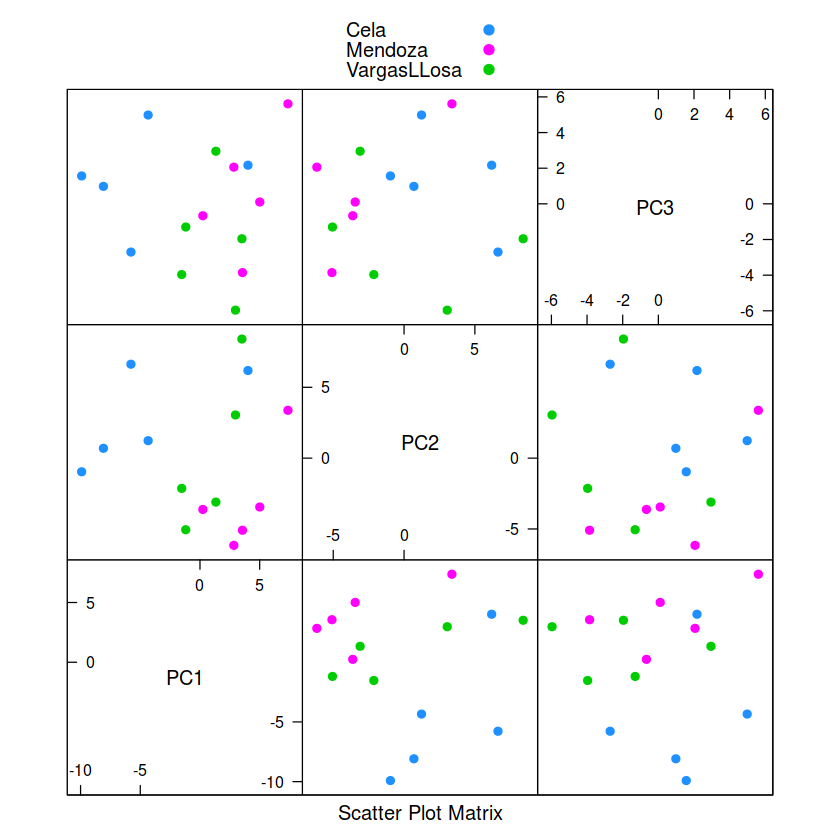

In [17]:
library(lattice)
splom(spanish_x[, 1:3], groups = spanishMeta$Author, pch = 19, col = c("dodgerblue", "magenta", 
    "green3"), key = list(text = list(levels(spanishMeta$FullName)), points = list(pch = 19, 
    col = c("dodgerblue", "magenta", "green3"))))

In [18]:
summary(spanish_pca)

Importance of components:
                          PC1    PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     5.0623 4.6688 3.34736 3.01422 2.84788 2.73612 2.61125
Proportion of Variance 0.2136 0.1817 0.09337 0.07571 0.06759 0.06239 0.05682
Cumulative Proportion  0.2136 0.3952 0.48858 0.56429 0.63188 0.69427 0.75109
                           PC8     PC9    PC10    PC11    PC12    PC13    PC14
Standard deviation     2.38516 2.37170 2.22456 2.06076 1.95823 1.82924 1.47628
Proportion of Variance 0.04741 0.04687 0.04124 0.03539 0.03196 0.02788 0.01816
Cumulative Proportion  0.79850 0.84537 0.88661 0.92200 0.95395 0.98184 1.00000
                            PC15
Standard deviation     1.382e-15
Proportion of Variance 0.000e+00
Cumulative Proportion  1.000e+00

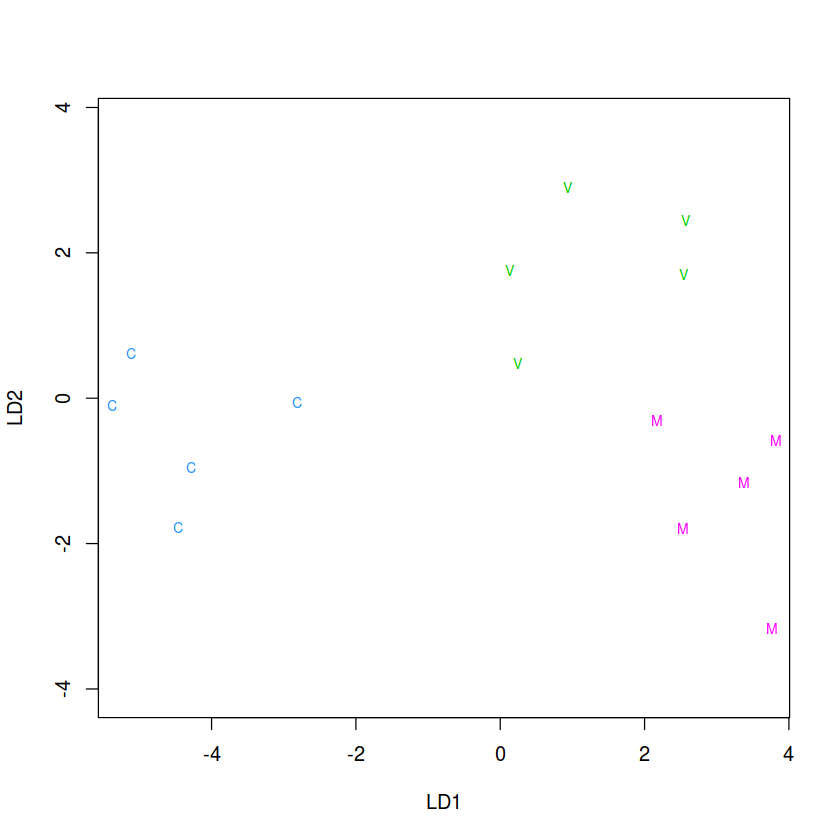

In [19]:
spanish_pca_lda <- lda(spanishMeta$Author ~ PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8, data = spanish_x)
# The axis represent the two most significant linear discriminant scores which can be used for classification
plot(spanish_pca_lda, col=c("dodgerblue", "magenta", "green3")[spanishMeta$Author])

In [20]:
predict(spanish_pca_lda)$posterior %>% round(4)

,C,M,V
X14458gll,1.0000,0.0000,0.0000
X14459gll,1.0000,0.0000,0.0000
X14460gll,1.0000,0.0000,0.0000
X14461gll,1.0000,0.0000,0.0000
X14462gll,0.9999,0.0000,0.0001
X14463gll,0.0000,0.9988,0.0012
X14464gll,0.0000,1.0000,0.0000
X14465gll,0.0000,0.9965,0.0035
X14466gll,0.0000,0.9992,0.0008
X14467gll,0.0000,0.8416,0.1584


In [21]:
print(spanish_pca_lda)

Call:
lda(spanishMeta$Author ~ PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + 
    PC7 + PC8, data = spanish_x)

Prior probabilities of groups:
        C         M         V 
0.3333333 0.3333333 0.3333333 

Group means:
        PC1        PC2        PC3         PC4        PC5         PC6        PC7
C -4.820024  2.7560056  1.3985890 -0.94026140 -0.2141179 -0.02702131 -0.5425466
M  3.801425 -2.9890677  0.6494555 -0.01748498 -0.4472681  1.75549883 -0.6416654
V  1.018598  0.2330621 -2.0480445  0.95774638  0.6613860 -1.72847752  1.1842120
          PC8
C  0.86906543
M  0.09646039
V -0.96552582

Coefficients of linear discriminants:
            LD1         LD2
PC1  0.51799691 -0.02441564
PC2 -0.37494794  0.07849967
PC3 -0.23194626 -0.24336748
PC4  0.22528923  0.12521671
PC5  0.01839796  0.12265163
PC6  0.17554301 -0.38491079
PC7  0.10699689  0.24999510
PC8 -0.32246252 -0.20825972

Proportion of trace:
   LD1    LD2 
0.8466 0.1534 


In [22]:
# Returns the mean for the normal distribution representing each author
spanish_pca_lda$means

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
C,-4.820024,2.7560056,1.3985890,-0.94026140,-0.2141179,-0.02702131,-0.5425466,0.86906543
M,3.801425,-2.9890677,0.6494555,-0.01748498,-0.4472681,1.75549883,-0.6416654,0.09646039
V,1.018598,0.2330621,-2.0480445,0.95774638,0.6613860,-1.72847752,1.1842120,-0.96552582


In [23]:
spanish_manova = manova(cbind(PC1, PC2, PC3, PC4, PC5, PC6, PC7, PC8) ~ spanishMeta$Author, 
    data = spanish_x)
summary(spanish_manova)

                   Df Pillai approx F num Df den Df  Pr(>F)  
spanishMeta$Author  2 1.6283   3.2854     16     12 0.02134 *
Residuals          12                                        
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [26]:
# Print the confusion matrix
table(predict(spanish_pca_lda)$class, spanishMeta$Author)

   
    C M V
  C 5 0 0
  M 0 5 0
  V 0 0 5

In [32]:
# Cases correctly classified
sum(predict(spanish_pca_lda)$class == spanishMeta$Author)

# Cases wrongly classified
sum(predict(spanish_pca_lda)$class != spanishMeta$Author)

[1] 15

[1] 0